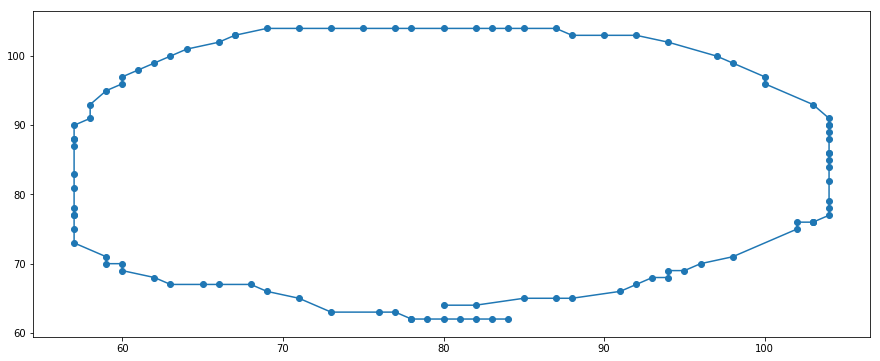

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
poly = np.array([[80, 64],
[82, 64],
[85, 65],
[87, 65],
[88, 65],
[91, 66],
[92, 67],
[93, 68],
[94, 68],
[94, 69],
[95, 69],
[96, 70],
[98, 71],
[102, 75],
[102, 76],
[103, 76],
[103, 76],
[103, 76],
[104, 77],
[104, 78],
[104, 79],
[104, 82],
[104, 84],
[104, 85],
[104, 86],
[104, 86],
[104, 88],
[104, 89],
[104, 90],
[104, 90],
[104, 91],
[103, 93],
[100, 96],
[100, 97],
[98, 99],
[97, 100],
[94, 102],
[92, 103],
[90, 103],
[88, 103],
[87, 104],
[85, 104],
[84, 104],
[83, 104],
[82, 104],
[80, 104],
[78, 104],
[77, 104],
[75, 104],
[73, 104],
[71, 104],
[69, 104],
[67, 103],
[67, 103],
[66, 102],
[64, 101],
[63, 100],
[62, 99],
[61, 98],
[60, 97],
[60, 96],
[59, 95],
[58, 93],
[58, 91],
[57, 90],
[57, 88],
[57, 88],
[57, 87],
[57, 83],
[57, 81],
[57, 78],
[57, 77],
[57, 77],
[57, 75],
[57, 73],
[59, 71],
[59, 70],
[60, 70],
[60, 69],
[62, 68],
[63, 67],
[65, 67],
[66, 67],
[68, 67],
[69, 66],
[71, 65],
[73, 63],
[76, 63],
[77, 63],
[78, 62],
[78, 62],
[79, 62],
[80, 62],
[81, 62],
[82, 62],
[83, 62],
[84, 62]
                ],dtype='double');




#poly = poly0
fig = plt.figure(figsize=(15,6))
fig.gca()
plt.plot(poly[:,0],poly[:,1])
plt.scatter(poly[:,0],poly[:,1])

In [23]:
import math
#from http://mathworld.wolfram.com/Point-LineDistance2-Dimensional.html
def point_line_distance(x0,y0,x1,y1,x2,y2):
    return abs((x2-x1)*(y1-y0)-(x1-x0)*(y2-y1)) / math.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1))

print point_line_distance(1,3,1,2,2,3)
print point_line_distance(0,0,-2,0,0,-2)


0.707106781187
1.41421356237


In [54]:
def simplify_reumann_witkam(tolerance,p,step=-1):
    mask = np.ones(len(p),dtype='bool')
    first = 0
    second = 1
    third = 2
    
    marker = np.array([p[first],p[second],p[third]],dtype='double')
    if step == -1:
        maxstep = len(p)
    else:
        maxstep = min(step,len(p))

    for i in range(0,min(maxstep,len(p)-2)):
        dist = point_line_distance(p[third,0],p[third,1],p[first,0],p[first,1],p[second,0],p[second,1])
#         print dist
        if dist <= tolerance:
            mask[third] = False
            third = third+1 
        else:
            first = second
            second = third
            third = third+1
        marker = np.array([p[first],p[second]],dtype='double')
            
    return mask,marker

In [87]:
def reumann_witkam(tol, p):
    ret = []
    first = 0
    second = 1
    third = 2
    
    for i in range(0, len(p)-2):
        dist = point_line_distance(p[third][0],p[third][1],p[first][0],p[first][1],p[second][0],p[second][1])

        if dist <= tol:
            third = third+1 
        else:
            ret.append(p[third])
            first = second
            second = third
            third = third+1
    return ret

In [88]:
polyline = poly.tolist()
reumann_witkam(2., polyline)

[[92.0, 67.0],
 [98.0, 71.0],
 [104.0, 78.0],
 [104.0, 82.0],
 [100.0, 96.0],
 [94.0, 102.0],
 [90.0, 103.0],
 [77.0, 104.0],
 [66.0, 102.0],
 [62.0, 99.0],
 [58.0, 93.0],
 [57.0, 87.0],
 [57.0, 73.0],
 [60.0, 70.0],
 [66.0, 67.0],
 [81.0, 62.0]]

/home/g/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


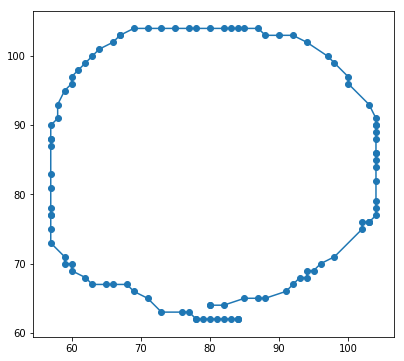

In [45]:
mask,_ = simplify_reumann_witkam(2.0,poly)

#figure
fig = plt.figure(figsize=(15,6))
fig.gca().set_aspect('equal', adjustable='box')

# the original polygon
plt.plot(poly[:,0],poly[:,1])
plt.scatter(poly[:,0],poly[:,1])


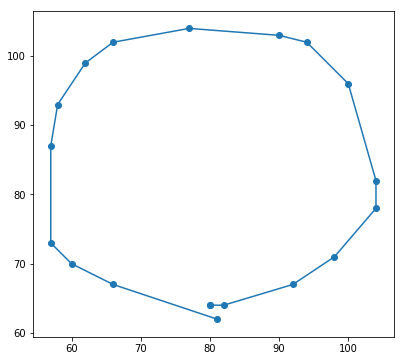

In [46]:

#figure
fig = plt.figure(figsize=(15,6))
fig.gca().set_aspect('equal', adjustable='box')


#simplified polygon
simplified = poly[mask]
plt.plot(simplified[:,0],simplified[:,1])
plt.scatter(simplified[:,0],simplified[:,1])


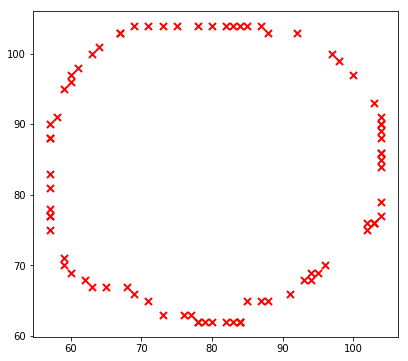

In [47]:

#figure
fig = plt.figure(figsize=(15,6))
fig.gca().set_aspect('equal', adjustable='box')

#deleted points
deleted = poly[np.logical_not(mask)]
plt.scatter(deleted[:,0],deleted[:,1],color='red',marker='x',s=50,linewidth=2.0)

In [27]:
def plotpoly(tolerance,step):
    mask,marker = simplify_reumann_witkam(tolerance,poly,step)
    simplified = poly[mask]

    #figure
    fig = plt.figure(figsize=(15,6))
    fig.gca().set_aspect('equal', adjustable='box')

    #the original polygon
    plt.plot(poly[:,0],poly[:,1])
    plt.scatter(poly[:,0],poly[:,1])

    #simplified polygon
    simplified = poly[mask]
    plt.plot(simplified[:,0],simplified[:,1])
    plt.scatter(simplified[:,0],simplified[:,1])

    #deleted points
    deleted = poly[np.logical_not(mask)]
    plt.scatter(deleted[:,0],deleted[:,1],color='red',marker='x',s=50,linewidth=2.0)
    
    #marker depending on steps
    if len(marker):
        m = plt.Line2D(marker[:,0],marker[:,1],color='red')
        vec = marker[1]-marker[0]
        len1vec = vec / math.sqrt(np.dot(vec,vec))

        p1 = marker[0]-1*vec
        p2 = marker[0]+2*vec
        line = np.array([p1,p2])
        m = plt.Line2D(line[:,0],line[:,1],color='red',linewidth=2.0)
        fig.gca().add_artist(m)

        normvec = np.array([-len1vec[1],len1vec[0]])  
        left = marker[0]+ tolerance*normvec
        p1 = left-1*vec
        p2 = left+2*vec
        line = np.array([p1,p2])
        l = plt.Line2D(line[:,0],line[:,1],linestyle=':',color='red',linewidth=2.0)
        fig.gca().add_artist(l)

        right = marker[0]- tolerance*normvec
        p1 = right-1*vec
        p2 = right+2*vec
        line = np.array([p1,p2])
        r = plt.Line2D(line[:,0],line[:,1],linestyle=':',color='red',linewidth=2.0)
        fig.gca().add_artist(r)

from IPython.html.widgets import *
interact(plotpoly, tolerance=(0,10,0.1),step=(0,100,1));

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTUuMCwgZGVzY3JpcHRpb249dSd0b2xlcmFuY2UnLCBtYXg9MTAuMCksIEludFNsaWRlcih2YWx1ZT01MCwgZGVzY3JpcHTigKY=
